<a href="https://colab.research.google.com/github/MoreenMarutaData/PREDICTION-OF-HOUSING-PRICES-FOR-HASS-CONSULTING-COMPANY-COMPANY/blob/main/PYTHON_NOTEBOOK_FOR_PREDICTION_OF_HOUSE_PRICES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PREDICTION OF HOUSE PRICES FOR HASS COMPANY

## Define the question

I have been recruited as a data scientist to help provide the best model for future prediction of prices for houses given some data on the features of the houses

### The Metric for Success

To find the best model that predicts the prices of a house given various features values

### Understanding the context

There are various regression models used in machine learning. Depending on the features, accuracy, RMSE, R Score and MSE, a good regression model should be choosen, so it is easier to predict the prices of houses for clients.

### The Experimental Design

Reading the Data

Prepaing and cleaning the Data

Exploratory Data Analysis

Carrying out various regression models

Conclusions and recommendations

## IMPORT LIBRARIES

In [ ]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Regression Libraries libraries
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
# Other ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler


## LOAD THE DATASET AND DESCRIPTION

In [ ]:
housing=pd.read_csv('http://bit.ly/IndependentProjectWeek7Dataset')
housing

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287



*   Id 
* price  - Price of the house
* bedrooms - Number of Bedrooms
* bathrooms - Number of Bathrooms
* sqft_living - Square feet area of living area
* sqft_lot  - Square feet area of parking Layout
* floors - Number of Floors
* waterfront - Whether waterfront is there or not
* view - Number of Views
* grade - Grades
* sqft_above
* sqft_basement - Square feet area off basement
* yr_built - Year the house is built
* yr_renovated - Year the house is renovated
* zipcode - zipcode of the house
* lat : Latitude of the house
* lon : Longitude of the house
* sqft_living15
* sqft_lot15



## DATA UNDERSTANDING AND CLEANING

In [ ]:
housing.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
housing.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [ ]:
housing.shape

(21613, 20)

In [ ]:
housing.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


lets check for duplicate values in our dataset

In [ ]:
housing.duplicated().sum()

3

In [ ]:
housing.loc[housing.duplicated(), :]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3951,1825069031,550000.0,4,1.75,2410,8447,2.0,0,3,4,8,2060,350,1936,1980,98074,47.6499,-122.088,2520,14789
14983,6308000010,585000.0,3,2.50,2290,5089,2.0,0,0,3,9,2290,0,2001,0,98006,47.5443,-122.172,2290,7984
20054,8648900110,555000.0,3,2.50,1940,3211,2.0,0,0,3,8,1940,0,2009,0,98027,47.5644,-122.093,1880,3078


In [ ]:
housing=housing.drop_duplicates(keep=False)
housing.duplicated().sum()

0

In [ ]:
housing.shape

(21607, 20)

lets check for missing values

In [ ]:
housing.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

lets hande the columns.First check the year columns


In [ ]:
housing['yr_renovated'].unique()

array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944])

lets call the dataframe that has renovated houses R_houses

In [ ]:
R_houses=housing[housing['yr_renovated']!=0].value_counts()
R_houses.head()

id          price      bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode  lat      long      sqft_living15  sqft_lot15
9829200250  1700000.0  3         2.00       2600         6600      2.0     0           4     3          10     1930        670            1970      2014          98122    47.6055  -122.285  2670           6270          1
2489200070  767500.0   6         3.50       2410         6000      2.0     0           4     3          9      2220        190            1916      1990          98136    47.5400  -122.382  1980           6000          1
2481630180  1140000.0  4         2.25       3310         127631    2.0     0           0     5          9      3310        0              1924      1956          98072    47.7320  -122.134  3830           43959         1
2473100635  297950.0   3         2.00       1240         10800     1.0     0           0     3          7      1240      

In [ ]:
housing.shape

(21607, 20)

In [ ]:
housing.shape

(21607, 20)

lets drop unnecessary columns. sqft iving and sqft above are same so i'll drop sqft above, sqft lot 15 and sqft living 15.

In [ ]:
housing.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
housing=housing.drop([ 'sqft_above','sqft_living15', 'sqft_lot15'], axis=1)

check for unique values in all columns

In [ ]:
#Lets see when the houses were renovated
r =housing.yr_renovated.unique()
print(r.max())
print(r.min())

2015
0


In [ ]:
b=housing.yr_built.unique()
print(b.max())
print(b.min())

2015
1900


In [ ]:
bed=housing.bathrooms.unique()
bed

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 0.  , 1.25, 5.25, 6.  , 0.5 ,
       5.5 , 6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [ ]:
bath=housing.bedrooms.unique()
bath

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33])

In [ ]:
floors=housing.floors.unique()
floors

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [ ]:
wf=housing.waterfront.unique()
wf

array([0, 1])

In [ ]:
c=housing.condition.unique()
c

array([3, 5, 4, 1, 2])

In [ ]:
g=housing.grade.unique()
g

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13,  1])

In [ ]:
p=housing.price.unique()
p

array([221900., 538000., 180000., ..., 541800., 610685., 402101.])

check for outliers

In [ ]:
housing.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_basement',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long'],
      dtype='object')

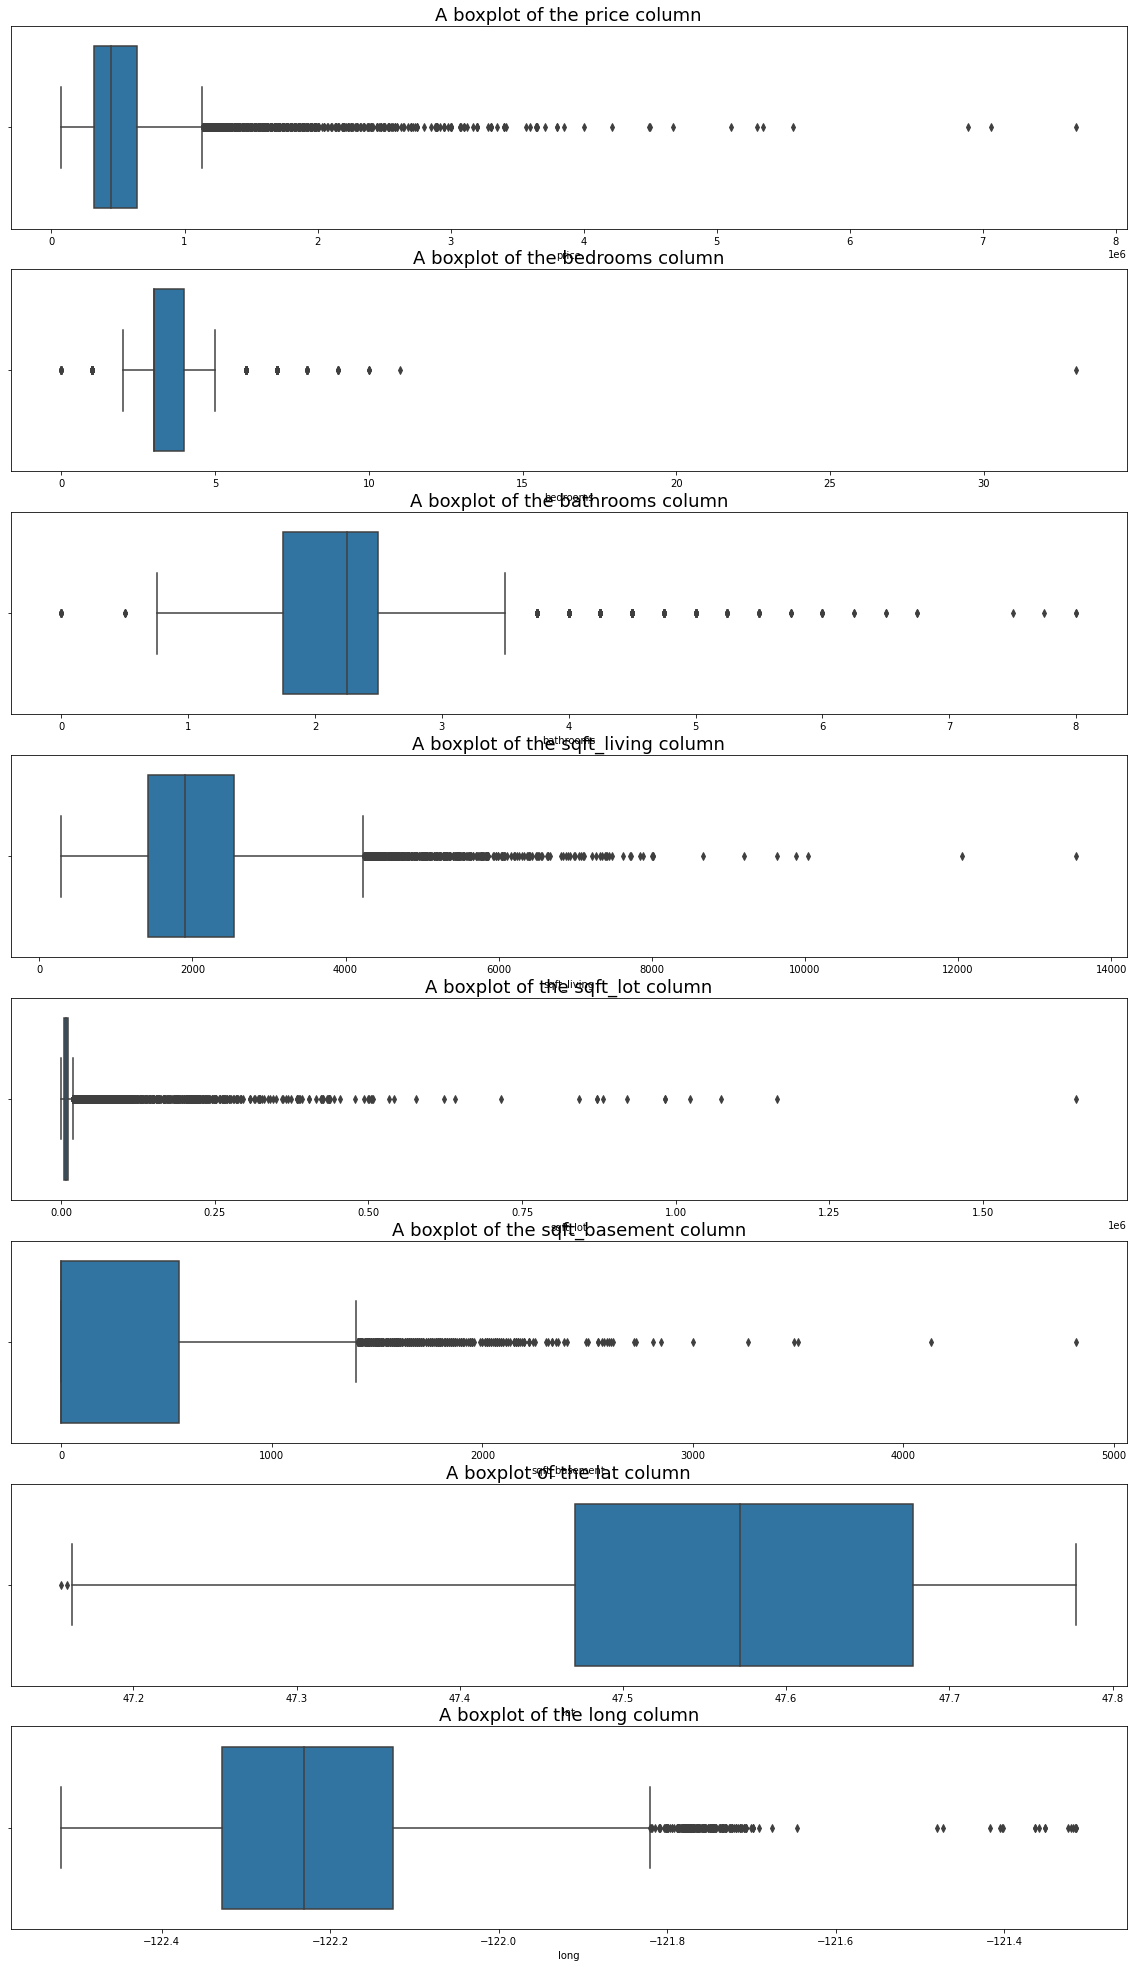

In [ ]:
col_names = [ 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_basement', 'lat', 'long']

fig, ax = plt.subplots(len(col_names), figsize = (20,35))
for i, col_val in enumerate(col_names):
      sns.boxplot(x = housing[col_val], ax=ax[i])
      ax[i].set_title('A boxplot of the {} column'.format(col_val), fontsize=18)
      # ax[i].set_xlabel(col_val, fontsize=8)
plt.show()

we have a lot of outliers but let us remove them for the purpose of the model we'll try later on

In [ ]:
housing.shape

(21607, 17)

In [ ]:
#Dealing with outliers 
Q1 = housing.quantile(0.25)
Q3 = housing.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range 
housing = housing[~((housing < (Q1 - 1.5 * IQR)) | (housing > (Q3 + 1.5 * IQR))).any(axis=1)]

# Print the shape of the new dataset
print(housing.shape)


(15139, 17)


## EXPLORATORY DATA ANALYSIS

In [ ]:
housing.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_basement',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long'],
      dtype='object')

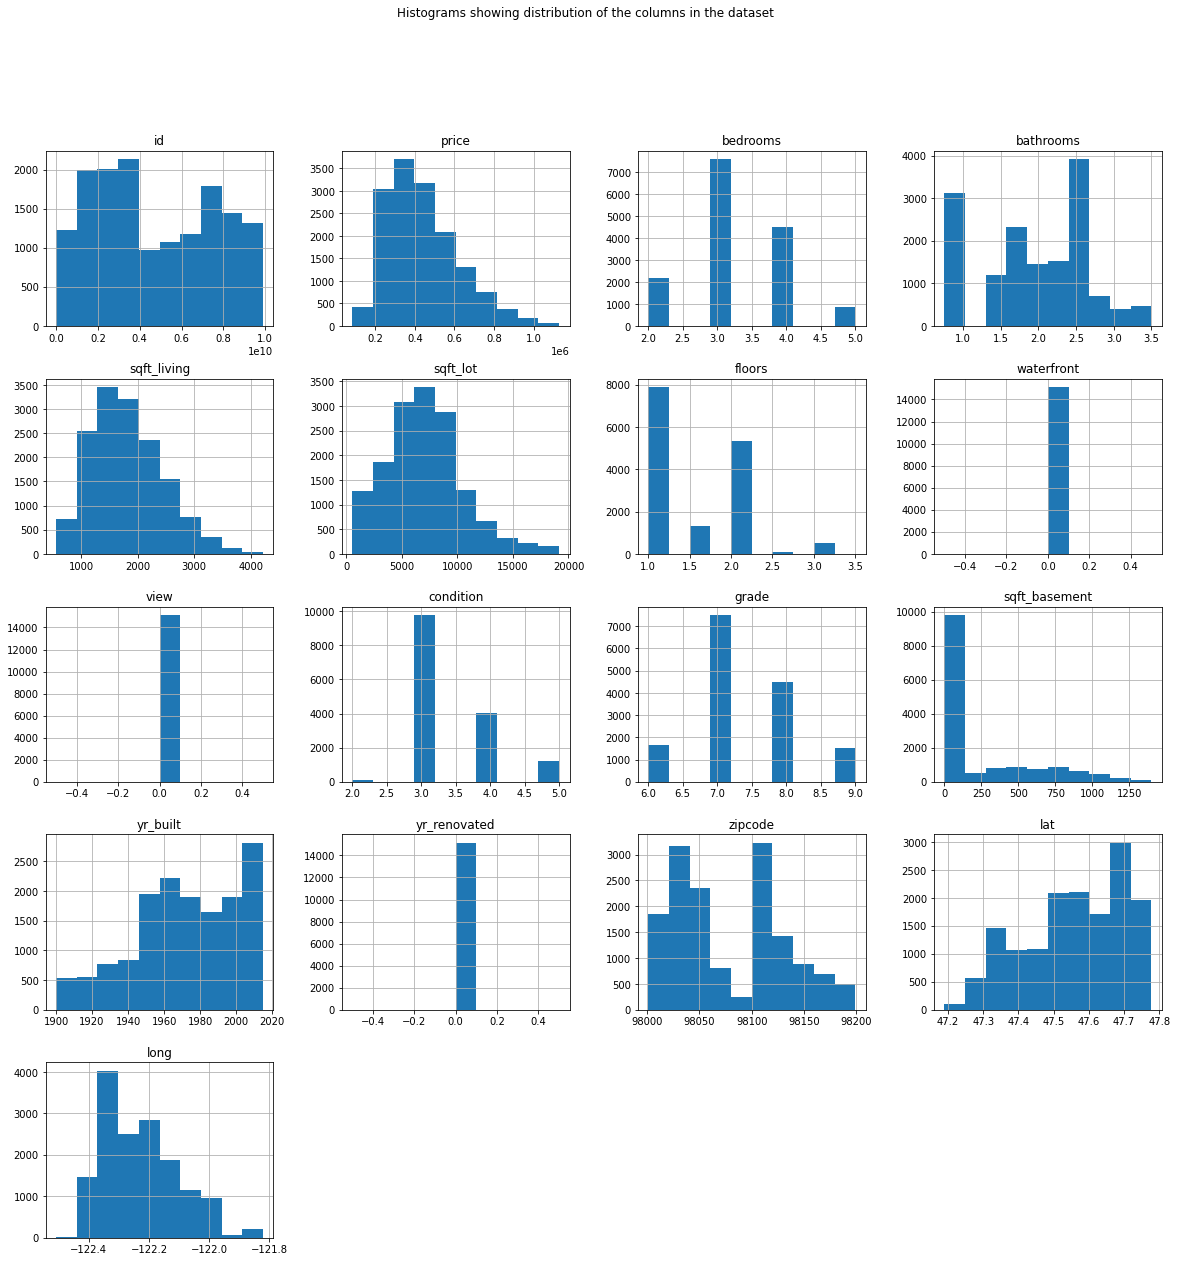

In [ ]:
housing.hist(bins=10, figsize=(20,20))
plt.suptitle("Histograms showing distribution of the columns in the dataset")
plt.savefig('Histogram')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


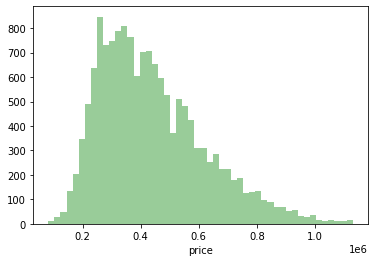

In [ ]:
# Checking the distribution of the dependent variable, Price
sns.distplot(housing['price'], kde = False, color ='green', bins = 50)

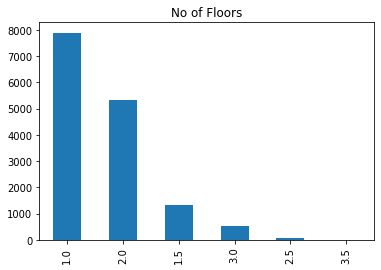

In [ ]:
housing['floors'].value_counts().plot.bar(title='No of Floors')

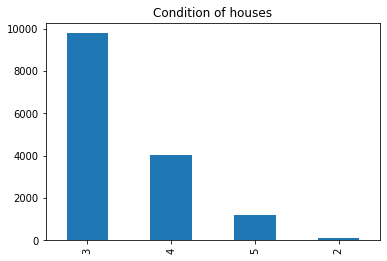

In [ ]:
housing['condition'].value_counts().plot.bar(title='Condition of houses')

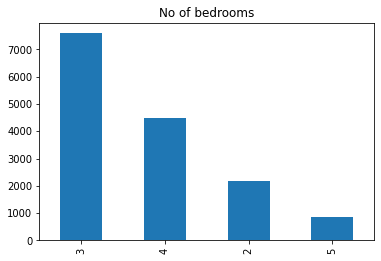

In [ ]:
housing['bedrooms'].value_counts().plot.bar(title='No of bedrooms')

In [ ]:
housing['price']

0        221900.0
2        180000.0
3        604000.0
4        510000.0
6        257500.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 15139, dtype: float64

Text(0.5, 1.0, 'Price per Number of Bedrooms')

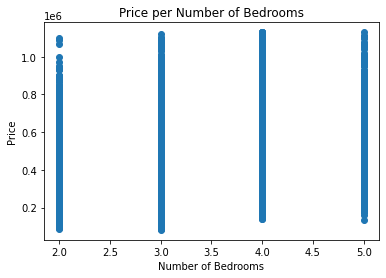

In [ ]:
# price of the houses according to the number of bedrooms
plt.scatter(housing.bedrooms, housing.price)
plt.xlabel("Number of Bedrooms")
plt.ylabel("Price")
plt.title("Price per Number of Bedrooms")

Text(0.5, 1.0, 'Price per Number of Bathrooms')

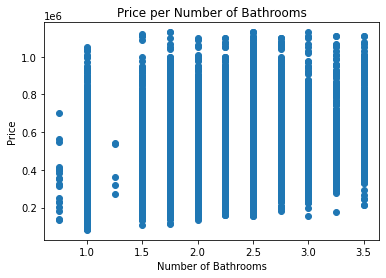

In [ ]:
# price of the houses according to the number of bathrooms
plt.scatter(housing.bathrooms, housing.price.values)
plt.xlabel("Number of Bathrooms")
plt.ylabel("Price")
plt.title("Price per Number of Bathrooms")

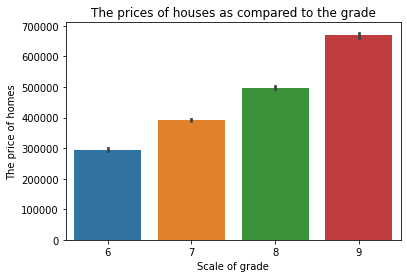

In [ ]:
sns.barplot(x = housing['grade'], y = housing['price'])
plt.xlabel('Scale of grade')
plt.ylabel('The price of homes')
plt.title('The prices of houses as compared to the grade')
plt.show()

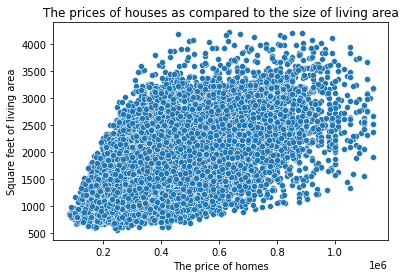

<Figure size 864x720 with 0 Axes>

In [101]:
sns.scatterplot(y = housing['sqft_living'], x = housing['price'], hue_order='bedrooms')
plt.ylabel('Square feet of living area')
plt.xlabel('The price of homes')
plt.title('The prices of houses as compared to the size of living area')
plt.figure(figsize=(12,10))
plt.show()

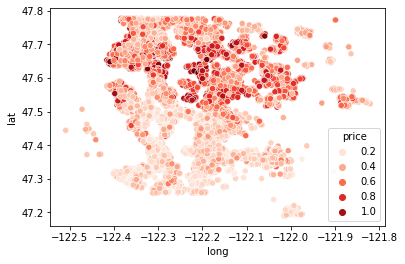

In [99]:
sns.scatterplot(housing['long'], housing['lat'], hue=housing['price'], palette='Reds')

## REGRESSION

### PRE PROCESSING

In [ ]:
df=housing.drop(columns=['zipcode'], inplace=False,axis=1)

first we need to scale our values to values that are comparable to each other since some values like sqft of the living area are high and could end up carrying most weight for our model

In [ ]:
from sklearn_pandas import DataFrameMapper
mapper=DataFrameMapper([(df.columns, StandardScaler())])
scaled_features = mapper.fit_transform(df.copy(), 14)
df=pd.DataFrame(scaled_features, index=df.index, columns=df.columns)
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,lat,long
0,0.843789,-1.198411,-0.344240,-1.503787,-1.026155,-0.412704,-0.861459,0.0,0.0,-0.650094,-0.475832,-0.645961,-0.574926,0.0,-0.333380,-0.225868
2,0.318285,-1.429073,-1.634840,-1.503787,-1.681090,0.851326,-0.861459,0.0,0.0,-0.650094,-1.712719,-0.645961,-1.328191,0.0,1.261033,-0.033003
3,-0.784893,0.905069,0.946361,1.579656,0.219820,-0.601582,-0.861459,0.0,0.0,2.438975,-0.475832,1.926391,-0.232533,0.0,-0.265862,-1.318764
4,-0.971826,0.387594,-0.344240,0.037935,-0.227453,0.293410,-0.861459,0.0,0.0,-0.650094,0.761054,-0.645961,0.520732,0.0,0.409320,1.477766
6,-1.193915,-1.002431,-0.344240,0.423365,-0.171544,-0.073014,0.965484,0.0,0.0,-0.650094,-0.475832,-0.645961,0.794647,0.0,-1.750558,-0.788388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,-1.565254,-0.438164,-0.344240,0.808795,-0.467063,-1.725842,2.792427,0.0,0.0,-0.650094,0.761054,-0.645961,1.273997,0.0,0.989554,-0.941072
21609,0.658105,-0.217962,0.946361,0.808795,0.778912,-0.365339,0.965484,0.0,0.0,-0.650094,0.761054,-0.645961,1.445193,0.0,-0.336897,-1.069648
21610,-1.123078,-0.206395,-1.634840,-1.889217,-1.281739,-1.662204,0.965484,0.0,0.0,-0.650094,-0.475832,-0.645961,1.273997,0.0,0.251777,-0.563380
21611,-1.555322,-0.217962,-0.344240,0.808795,-0.355245,-1.360581,0.965484,0.0,0.0,-0.650094,0.761054,-0.645961,1.102800,0.0,-0.169508,1.284901


In [ ]:
y=df['price'].values
X=df.iloc[:,2:].values
X

array([[-0.34423961, -1.50378659, -1.02615479, ...,  0.        ,
        -0.33338005, -0.22586753],
       [-1.63483976, -1.50378659, -1.68109038, ...,  0.        ,
         1.26103329, -0.03300341],
       [ 0.94636055,  1.57965569,  0.21982025, ...,  0.        ,
        -0.26586188, -1.31876419],
       ...,
       [-1.63483976, -1.88921687, -1.28173941, ...,  0.        ,
         0.25177739, -0.56337973],
       [-0.34423961,  0.80879512, -0.35524515, ...,  0.        ,
        -0.16950783,  1.28490139],
       [-1.63483976, -1.88921687, -1.28173941, ...,  0.        ,
         0.24966744, -0.56337973]])

lets create dataframes from our new  x and y values incase we need to use them. dx for independent variables and dy for the dependent variable

In [ ]:
dx=pd.DataFrame(X, columns=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','floors', 'waterfront', 'view','condition',
                            'grade', 'sqft_basement','yr_built', 'yr_renovated', 'lat', 'long'])
dx.head(2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,lat,long
0,-0.34424,-1.503787,-1.026155,-0.412704,-0.861459,0.0,0.0,-0.650094,-0.475832,-0.645961,-0.574926,0.0,-0.333380,-0.225868
1,-1.63484,-1.503787,-1.681090,0.851326,-0.861459,0.0,0.0,-0.650094,-1.712719,-0.645961,-1.328191,0.0,1.261033,-0.033003


In [ ]:
dy=pd.DataFrame(y, columns=['price'])
dy.head(2)

,price
0,-1.198411
1,-1.429073


lets check for multicollinearity

In [ ]:
corr=dx.corr()
pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns=corr.columns)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,lat,long
bedrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bathrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sqft_living,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sqft_lot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
floors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
waterfront,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
view,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
grade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sqft_basement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The Nan values show that there is no correlation between our independent variables so we shal proceed with all of them as X

function we shall use for prediction

In [ ]:
def myfunc(X):
  return slope*X + intercept

###MULTIPLE LINEAR REGRESSION

In [ ]:
# Split data into training sets and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)
X_train

linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = linear.predict(X_test)

pred_df = pd.DataFrame({'OG' : y_test, 'Predictions' : y_pred})
pred_df

,OG,Predictions
0,-0.768467,-0.180169
1,-1.029957,-0.129280
2,-0.845537,-0.593289
3,1.791383,0.396409
4,-0.438164,-0.042741
...,...,...
3780,0.706887,1.029858
3781,-1.318972,-1.452147
3782,2.259312,1.420552
3783,-0.217962,0.660949


In [ ]:
# Coefficients
linear.coef_

coef_dict = {}

for coef, features in zip(linear.coef_, dx.columns):
  coef_dict[features] = coef

coef_dict

{'bathrooms': 0.06810327746858097,
 'bedrooms': -0.0371763257146167,
 'condition': 0.09770404960930848,
 'floors': 0.04140079990178189,
 'grade': 0.383936042827612,
 'lat': 0.41111203355877657,
 'long': 0.04864091402881415,
 'sqft_basement': -0.027667474199785186,
 'sqft_living': 0.38470324133086936,
 'sqft_lot': -0.10211616483041032,
 'view': 1.6653345369377348e-16,
 'waterfront': 4.683753385137379e-17,
 'yr_built': -0.3153667202546188,
 'yr_renovated': 0.0}

In [ ]:
print('The R2 score for  Linear Regressor (train) is : ', linear.score(X_train, y_train))
print('The R2 score for  Linear Regressor (test) is : ', linear.score(X_test, y_test))
print('The RMSE for Linear Regressor is : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

The R2 score for  Linear Regressor (train) is :  0.6441412173932848
The R2 score for  Linear Regressor (test) is :  0.6423954141853676
The RMSE for Linear Regressor is :  0.597402308193605


Our model is working well. We can use this model to predict future values

In [ ]:
residuals = np.subtract(y_pred, y_test)
residuals.mean()

-0.005682529102147319

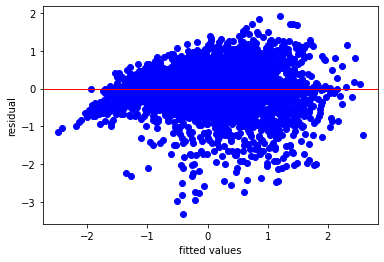

In [ ]:

# plotting the residuals

plt.scatter(y_pred, residuals, color = 'blue')
plt.figsize = [12, 10]
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y = residuals.mean(), color = 'red', linewidth = 1)
plt.show()

In [ ]:
import scipy.stats as stats
test_result, p_value = stats.bartlett(y_pred, residuals)
print("Test result:", test_result)
print("P-value:", p_value)

Test result: 350.00873520762605
P-value: 4.219270706763473e-78


In [ ]:
test_result, p_value = stats.bartlett(y_pred, residuals)

# compute critical value for the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = stats.chi2.ppf(probability, degree_of_freedom)

print(critical_value)
print("Degree of Freedom:", degree_of_freedom)
print("Probability:", probability)

if (test_result > critical_value):
  print('the variances are unequal, the model should be reassessed')
else:
  print('the variances are homogeneous.')                                      

inf
Degree of Freedom: 3784
Probability: 1.0
the variances are homogeneous.


### RIDGE REGRESSION

My data had zero collinearity

In [ ]:
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.model_selection import RepeatedKFold
from numpy import arange

model= Ridge(alpha=1.0)
cv= RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model
scores=cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# forcing scores to be positive
scores= absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 0.447 (0.007)


In [ ]:

# fit model
model.fit(X,y)
cv=RepeatedKFold(n_splits=100, n_repeats=3, random_state=1)
# define grid
grid=dict()
grid['alpha']=arange(0, 1, 0.01)
# define search
search=GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=1)
# perform search
results=search.fit(X,y)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -0.447
Config: {'alpha': 0.99}


In [ ]:
ridge = Ridge(normalize=True)

grid_ridge =  GridSearchCV(estimator=ridge, param_grid={'alpha' : np.arange(0.1, 2, 5)}, cv=10, n_jobs=1, refit=True)

grid_ridge.fit(X_train, y_train)
grid_ridge.best_params_


{'alpha': 0.1}

In [ ]:
ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

In [ ]:
y_pred_r = ridge.predict(X_test)

pred_df_r = pd.DataFrame({'OG' : y_test, 'Predictions' : y_pred_r})
pred_df_r

,OG,Predictions
0,-0.768467,-0.172723
1,-1.029957,-0.137720
2,-0.845537,-0.540749
3,1.791383,0.340664
4,-0.438164,-0.056044
...,...,...
3780,0.706887,0.873749
3781,-1.318972,-1.343387
3782,2.259312,1.276736
3783,-0.217962,0.677920


In [ ]:
#Coefficients
coef_dict_r = {}

for coef, features in zip(ridge.coef_, dx.columns):
  coef_dict_r[features] = coef

coef_dict_r

{'bathrooms': 0.06567479378557312,
 'bedrooms': -0.010251320295842388,
 'condition': 0.0951432105797497,
 'floors': 0.055491028178223004,
 'grade': 0.34687407958022654,
 'lat': 0.38418467407443263,
 'long': 0.035857474050580436,
 'sqft_basement': 0.001593852705772062,
 'sqft_living': 0.3244708399193791,
 'sqft_lot': -0.08139590931450115,
 'view': 0.0,
 'waterfront': 0.0,
 'yr_built': -0.2532700088243251,
 'yr_renovated': 0.0}

convert our dictionary to dataframe so we can plot

In [ ]:
c=pd.DataFrame.from_dict(coef_dict_r, orient='index')

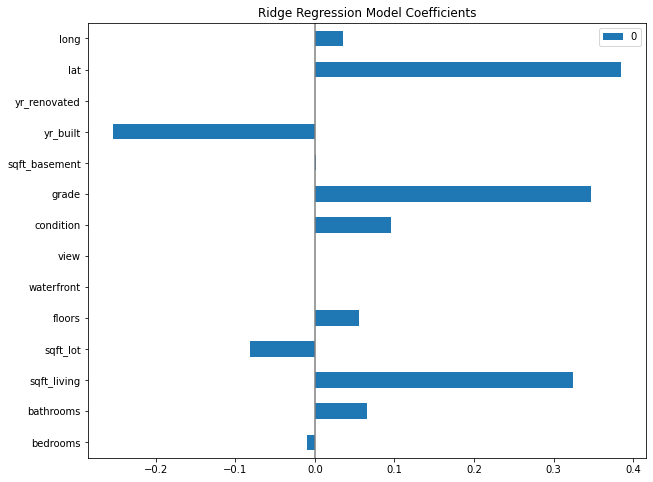

In [ ]:
#plotting coefficients
c.plot(kind='barh', figsize=(10, 8))
plt.title('Ridge Regression Model Coefficients')
plt.axvline(x=0, color='.5')
plt.show()

In [ ]:
# R2 & RMSE

print('The R2 score for  Ridge Regressor (train) is : ', ridge.score(X_train, y_train))
print('The R2 score for  Ridge Regressor (test) is : ', ridge.score(X_test, y_test))

print('The RMSE for Ridge Regressor is : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_r)))

The R2 score for  Ridge Regressor (train) is :  0.6380914179655182
The R2 score for  Ridge Regressor (test) is :  0.6361023830591933
The RMSE for Ridge Regressor is :  0.6026358480738009


In [ ]:
# R2 & RMSE
ridge1 = Ridge(normalize=True, alpha=0.1)

grid_ridge1 =  GridSearchCV(estimator=ridge1, param_grid={'alpha' : np.arange(0.1, 2, 5)}, cv=10, n_jobs=1, refit=True)

grid_ridge1.fit(X_train, y_train)
grid_ridge1.best_params_

ridge1 = Ridge(alpha=1, normalize=True)
ridge1.fit(X_train, y_train)

y_pred1= ridge1.predict(X_test)
print('The R2 score for  Ridge Regressor (train) is : ', ridge1.score(X_train, y_train))
print('The R2 score for  Ridge Regressor (test) is : ', ridge1.score(X_test, y_test))

print('The RMSE for Ridge Regressor is : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

The R2 score for  Ridge Regressor (train) is :  0.5107208661336784
The R2 score for  Ridge Regressor (test) is :  0.5106257326316649
The RMSE for Ridge Regressor is :  0.6988531405466433


In [ ]:

ridge2 = Ridge(normalize=True, alpha=0.01)

grid_ridge2 =  GridSearchCV(estimator=ridge2, param_grid={'alpha' : np.arange(0.1, 2, 5)}, cv=10, n_jobs=1, refit=True)

grid_ridge2.fit(X_train, y_train)
grid_ridge2.best_params_

ridge2 = Ridge(alpha=0.01, normalize=True)
ridge2.fit(X_train, y_train)

y_pred2= ridge2.predict(X_test)
# R2 & RMSE

print('The R2 score for  Ridge Regressor (train) is : ', ridge2.score(X_train, y_train))
print('The R2 score for  Ridge Regressor (test) is : ', ridge2.score(X_test, y_test))

print('The RMSE for Ridge Regressor is : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

The R2 score for  Ridge Regressor (train) is :  0.6440572311963866
The R2 score for  Ridge Regressor (test) is :  0.642240228409974
The RMSE for Ridge Regressor is :  0.597531918227103


In [ ]:
from sklearn.linear_model import RidgeCV
regr_cv=RidgeCV(alphas=[0.01, 0.1, 1])
model_cv=regr_cv.fit(dx,y)
model_cv.alpha_

1.0

our best model had an alpha of 0.01, with an rmse of 59% same to that of the multi linear regression model. It makes sense since our data lacked multicollinearity.It is perfoming poorly. could use more bias. the r score speaks of the reverse though.

### LASSO REGRESSION

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
lasso = Lasso(normalize=True)
grid_lasso =  GridSearchCV(estimator=lasso, param_grid={'alpha' : np.arange(0.1, 2, 5)}, scoring='neg_mean_squared_error', cv=10, n_jobs=1, refit=True)

In [ ]:
# Find the alpha
grid_lasso.fit(X_train, y_train)
grid_lasso.best_params_

{'alpha': 0.1}

In [ ]:
lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(X_train, y_train)

# Creating lasso regression with alpha value
regr = Lasso(alpha=0.1)

# Fitting the linear regression
model = regr.fit(dx, y)

y_pred3 = lasso.predict(X_test)

lasso_pred = pd.DataFrame({'OG' : y_test, 'Predictions' : y_pred3})
lasso_pred


,OG,Predictions
0,-0.768467,-0.003705
1,-1.029957,-0.003705
2,-0.845537,-0.003705
3,1.791383,-0.003705
4,-0.438164,-0.003705
...,...,...
3780,0.706887,-0.003705
3781,-1.318972,-0.003705
3782,2.259312,-0.003705
3783,-0.217962,-0.003705


In [ ]:
#Coefficients
coef_dict2 = {}

for coef, features in zip(lasso.coef_ , dx.columns):
  coef_dict2[features] = coef

coef_dict2

{'bathrooms': 0.0,
 'bedrooms': 0.0,
 'condition': 0.0,
 'floors': 0.0,
 'grade': 0.0,
 'lat': 0.0,
 'long': 0.0,
 'sqft_basement': 0.0,
 'sqft_living': 0.0,
 'sqft_lot': -0.0,
 'view': 0.0,
 'waterfront': 0.0,
 'yr_built': -0.0,
 'yr_renovated': 0.0}

In [ ]:
# Print scores, MSE, and coefficients
 
print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_)

lasso score: -1.3725018401133937e-05
lasso MSE: 1.0000137250184011
lasso coef: [ 0.  0.  0. -0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]


In [ ]:
# R2 & RMSE

print('The R2 score for  Lasso Regressor (train) is : ', lasso.score(X_train, y_train))
print('The R2 score for  Lasso Regressor (test) is : ', lasso.score(X_test, y_test))
print('The RMSE for Lasso Regressor is : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

The R2 score for  Lasso Regressor (train) is :  0.0
The R2 score for  Lasso Regressor (test) is :  -0.00022001122166770412
The RMSE for Lasso Regressor is :  0.9991095866387054


our values for lasso and linear regression are very different. Maybe this regression technique was not suitable. Lets try and plot. there is an overfitting. it is perfoming very poorly.

In [ ]:

# # Importing library for visualization
# #
# import matplotlib.pyplot as plt
# from sklearn.linear_model import Lasso
# coefsLasso = [] 


# alphasLasso = np.arange (0, 0.1, 0.0001)
# for i in range(200):
#     lasso = Lasso(alpha=alphasLasso[i])
#     lasso.fit(X_train, y_train)
#     coefsLasso.append(lasso.coef_) 

# # Building Lasso coefficient plots
# # 
# plt.figure(figsize = (16,7))

# plt.subplot(121)
# plt.plot(alphasLasso, coefsLasso,)
# plt.title('Lasso coefficients')
# plt.xlabel('alpha')
# plt.ylabel('coefs')


lets try a different alpha

In [ ]:
lasso = Lasso(normalize=True)
grid_lasso =  GridSearchCV(estimator=lasso, param_grid={'alpha' : np.arange(0.0001, 2, 5)}, scoring='neg_mean_squared_error', cv=10, n_jobs=1, refit=True)

In [ ]:
# Find the alpha
grid_lasso.fit(X_train, y_train)
grid_lasso.best_params_

lasso1 = Lasso(alpha=0.0001, normalize=True)
lasso1.fit(X_train, y_train)

# Creating lasso regression with alpha value
regr = Lasso(alpha=0.0001)

# Fitting the linear regression
model = regr.fit(dx, y)

y_pred4 = lasso1.predict(X_test)

lasso_p = pd.DataFrame({'OG' : y_test, 'Predictions' : y_pred4})
lasso_p

,OG,Predictions
0,-0.768467,-0.182695
1,-1.029957,-0.094012
2,-0.845537,-0.585403
3,1.791383,0.414214
4,-0.438164,-0.043545
...,...,...
3780,0.706887,0.953663
3781,-1.318972,-1.418201
3782,2.259312,1.356757
3783,-0.217962,0.710518


In [ ]:
# # print('The R2 score for  Lasso Regressor (train) is : ', lasso.score(X_train, y_train))
# print('The R2 score for  Lasso Regressor (test) is : ', lasso.score(X_test, y_test))
print('The RMSE for Lasso Regressor is : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))

The RMSE for Lasso Regressor is :  0.6001104383418093


### ELASTIC NET REGRESSION

Since its a combination of lasso and ridge i can already tell our results will be a miss due to the nature of our lasso regression. 

In [ ]:
elastic = ElasticNet(normalize=True)

grid_net =  GridSearchCV(estimator=elastic, param_grid={'alpha' : np.arange(0.0001, 2, 0.05), 'l1_ratio' : [.2, .4, .6, .8] }, cv=10, n_jobs=1, refit=True)

grid_net.fit(X_train, y_train)

grid_net.best_params_



{'alpha': 0.0001, 'l1_ratio': 0.8}

In [ ]:
elastic_net = ElasticNet(alpha = 0.0001, l1_ratio=0.8, normalize=True)

elastic_net.fit(X_train, y_train)

ElasticNet(alpha=0.0001, copy_X=True, fit_intercept=True, l1_ratio=0.8,
           max_iter=1000, normalize=True, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
y_pred_en = elastic_net.predict(X_test)

pred_df_en = pd.DataFrame({'OG' : y_test, 'Predictions' : y_pred_en})
pred_df_en

,OG,Predictions
0,-0.768467,-0.181129
1,-1.029957,-0.140657
2,-0.845537,-0.463042
3,1.791383,0.304450
4,-0.438164,-0.056967
...,...,...
3780,0.706887,0.711114
3781,-1.318972,-1.194453
3782,2.259312,1.135755
3783,-0.217962,0.669676


since we were using scaled values, we shall assume predictions by their absolute values

In [ ]:
coef_dict_en = {}

for coef, features in zip(elastic_net.coef_, dx.columns):
  coef_dict_en[features] = coef

coef_dict_en

{'bathrooms': 0.06220260972342893,
 'bedrooms': 0.0040722862426785635,
 'condition': 0.08332152945741692,
 'floors': 0.05136504416069744,
 'grade': 0.302388130926835,
 'lat': 0.34858098199636584,
 'long': 0.0120282344086365,
 'sqft_basement': 0.01352269978654,
 'sqft_living': 0.2811665212766179,
 'sqft_lot': -0.0584056784796968,
 'view': 0.0,
 'waterfront': 0.0,
 'yr_built': -0.18437137585325905,
 'yr_renovated': 0.0}

<BarContainer object of 14 artists>

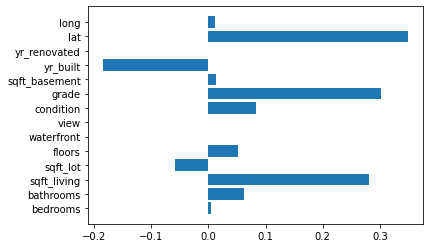

In [ ]:
plt.barh(y=dx.columns, width=elastic_net.coef_)

In [ ]:
print('The R2 score for  Elastic Net Regressor (train) is : ', elastic_net.score(X_train, y_train))
print('The R2 score for  Elastic Net Regressor (test) is : ', elastic_net.score(X_test, y_test))
print('The RMSE for Elastic Net Regressor is : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_en)))

The R2 score for  Elastic Net Regressor (train) is :  0.6174407938485005
The R2 score for  Elastic Net Regressor (test) is :  0.6160189694010896
The RMSE for Elastic Net Regressor is :  0.6190421796161358


changing the alpha values tremendously changes the results. The model performs well.

### QUANTILE REGRESSION

In [ ]:
housing.T.drop_duplicates().T

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,yr_built,zipcode,lat,long
0,7.129301e+09,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,3.0,7.0,0.0,1955.0,98178.0,47.5112,-122.257
2,5.631500e+09,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,3.0,6.0,0.0,1933.0,98028.0,47.7379,-122.233
3,2.487201e+09,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,5.0,7.0,910.0,1965.0,98136.0,47.5208,-122.393
4,1.954401e+09,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,3.0,8.0,0.0,1987.0,98074.0,47.6168,-122.045
6,1.321400e+09,257500.0,3.0,2.25,1715.0,6819.0,2.0,0.0,3.0,7.0,0.0,1995.0,98003.0,47.3097,-122.327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2.630000e+08,360000.0,3.0,2.50,1530.0,1131.0,3.0,0.0,3.0,8.0,0.0,2009.0,98103.0,47.6993,-122.346
21609,6.600060e+09,400000.0,4.0,2.50,2310.0,5813.0,2.0,0.0,3.0,8.0,0.0,2014.0,98146.0,47.5107,-122.362
21610,1.523300e+09,402101.0,2.0,0.75,1020.0,1350.0,2.0,0.0,3.0,7.0,0.0,2009.0,98144.0,47.5944,-122.299
21611,2.913101e+08,400000.0,3.0,2.50,1600.0,2388.0,2.0,0.0,3.0,8.0,0.0,2004.0,98027.0,47.5345,-122.069


In [ ]:
housing.duplicated().sum()

0

In [ ]:
y1=housing['price'].values
X1=housing.iloc[:,2:].values
print(X1.shape, y1.shape)
print(housing.columns)

(15139, 15) (15139,)
Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_basement',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long'],
      dtype='object')


In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=0)

In [ ]:
# Find the regression coefficients for the conditioned median, 0.5 quantile
import statsmodels.formula.api as smf
model = smf.quantreg('y1 ~ X1', housing).fit(q=0.5)
print(model.summary())



ValueError: ignored

In [ ]:
pd.get_dummies

<function pandas.core.reshape.reshape.get_dummies>

the error suggests that i might have redundant columns or my design matrix has fewer rows than columns or does not have a full rank and i'm not sure of how to go about it.

In [ ]:
# #we can do the models for other quantiles
# quantiles = np.arange(0.1,1,0.1) 
# models = []
# params = []

# for qt in quantiles: 
# 	res = mod.fit(q = qt )
# 	models.append(res)
# 	params.append([qt, res.params['Intercept'], res.params['x']] + res.conf_int().loc['x'].tolist())

# # Lastly we make a dataframe of the same name, so we we can view our different models.
# params = pd.DataFrame(dx = params, columns = ['qt', 'intercept', 'x_coef', 'cf_lower_bound', 'cf_upper_bound'])
# print(params)

## CONCLUSION

The multi linear regression perfomed best followed closely by the ridge. This is because there was no multicollinearity between our predictor variables.

## RECOMMENDATION

A more personalised approach of scaling values could be used.(different scaling).  The model could use a bit more tuning and bias.